### Luis René Rosales Reyes

#### 1. Importar librerías

In [16]:
import pandas as pd
import numpy as np
import io
import requests

#### 2. Importar archivos

In [17]:
# train = pd.read_csv("/Users/luisrosalesreyes/Diplomado-ITAM/modulo python/train.csv")
# test = pd.read_csv("/Users/luisrosalesreyes/Diplomado-ITAM/modulo python/test.csv")

url1 = "https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv"
s1 = requests.get(url1).content
train = pd.read_csv(io.StringIO(s1.decode('utf-8')))

url2 = "https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/test.csv"
s2 = requests.get(url2).content
test = pd.read_csv(io.StringIO(s2.decode('utf-8')))

#### Descripción general de los datos.

| Nombre_Columna    	| Descripción                                       	| Posibles Valores         	| Tipo de dato 	|
|-------------------	|---------------------------------------------------	|--------------------------	|--------------	|
| Loan_ID           	| Id del préstamo                                   	| Rango(LP001002-LP002990) 	| Ordinal      	|
| Gender            	| Género                                            	| Male, Female             	| Categórica   	|
| Married           	| Estado civil                                      	| Yes, No                  	| Categórica   	|
| Dependents        	| Número de dependientes económicos                 	| 0, 1, 2, 3+              	| Numérica     	|
| Education         	| Grado máximo de estudios del solicitante          	| Graduate, Not Graduate   	| Categórica   	|
| Self_Employed     	| Trabajador Independiente                          	| Yes, No                  	| Categórica   	|
| ApplicantIncome   	| Sueldo del solicitante                            	| Rango(150-81000)         	| Numérica     	|
| CoapplicantIncome 	| Sueldo del co-solicitante                         	| Rango(0-41667)           	| Numérica     	|
| LoanAmount        	| Monto del préstamo                                	| Rango(9-700)             	| Numérica     	|
| Credit_History    	| Historial Crediticio                              	| 1, 0                     	| Categórica   	|
| Property_Area     	| Tipo de zona geográfica donde vive el solicitante 	| Rural, Semiurban, Urban  	| Categórica   	|
| Loan_Status       	| Crédito otorgado                                  	| N, Y                     	| Categórica   	|

#### 3. ¿Cuántas observaciones se tienen en cada dataset?  ¿Cuántas columnas (puedes usar dataframe.columns)? 

In [18]:
print("Train es del tipo: " + str(type(train)))
print( "Test es del tipo: " + str(type(test)))
print("\n")
print("Train tiene: " + str(train.shape[0]) + " observaciones y " + str(train.shape[1]) + " columnas.")
print( "Test tiene: " + str(test.shape[0]) + " observaciones y " + str(test.shape[1]) + " columnas.")


Train es del tipo: <class 'pandas.core.frame.DataFrame'>
Test es del tipo: <class 'pandas.core.frame.DataFrame'>


Train tiene: 614 observaciones y 13 columnas.
Test tiene: 367 observaciones y 12 columnas.


#### Alternativa para numero de obsevaciones 

In [19]:
print("Train tiene: " + str(len(train)) + " observaciones.")
print( "Test tiene: " + str(len(test)) + " observaciones.")

print("\n")
print("Train tiene las siguientes variables: ")
print(str(list(train.columns)))

print("\n")
print("Test tiene las siguientes variables: ")
print(str(list(test.columns)))


Train tiene: 614 observaciones.
Test tiene: 367 observaciones.


Train tiene las siguientes variables: 
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


Test tiene las siguientes variables: 
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


#### 4. ¿Cuáles son los primeros 5 registros?

In [59]:
print("Las primeras 5 observaciones de train son:")
print("\n")
print(train.head(5))

print("\n")
print("Las primeras 5 observaciones de test son:")
print("\n")
print(test.head(5))

print("\n")
print("El valor de la tercer observaión de la variable ApplicantIncome es:")
print(train.iloc[2][6])
print(train.loc[2]['ApplicantIncome'])

Las primeras 5 observaciones de train son:


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0    

#### 5. Observa cuántos Nas tienes por columna y por fila (usa la función que vimos para hacerlo para todas las columnas/filas de una vez). Elimina las filas en donde haya valores nulos.

In [21]:
print("\n")
print("En la base train el número total de missing es: " + str(train.isnull().sum().sum()))
print("En la base test el número total de missing es: " + str(test.isnull().sum().sum()))

print("\n")
print("En la base train el número de missing por columna es:")
print(str(train.isnull().sum(axis=0)))

print("\n")
print("En la base test el número de missing por columna es:")
print(str(test.isnull().sum(axis=0)))

print("\n")
print("En la base train el número de missing por observación es:")
print(str(train.isnull().sum(axis=1)))

print("\n")
print("En la base test el número de missing por observación es:")
print(str(test.isnull().sum(axis=1)))
print("\n")

print("Se eliminan en ambas bases las observaciones con al menos un missing")
train2=train.dropna()
test2=test.dropna()

print("\n")
print("En la base test el número de missing por observación es:")
test2.isnull().sum(axis=1)
train2.isnull().sum(axis=1)



En la base train el número total de missing es: 149
En la base test el número total de missing es: 84


En la base train el número de missing por columna es:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


En la base test el número de missing por columna es:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


En la base train el número de missing por observación es:
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0


1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
12     0
13     0
14     0
15     0
17     0
18     0
20     0
21     0
22     0
25     0
26     0
27     0
28     0
31     0
32     0
33     0
34     0
37     0
38     0
39     0
      ..
575    0
577    0
578    0
580    0
581    0
582    0
584    0
585    0
586    0
587    0
589    0
590    0
591    0
593    0
594    0
595    0
596    0
598    0
599    0
602    0
603    0
604    0
606    0
607    0
608    0
609    0
610    0
611    0
612    0
613    0
Length: 480, dtype: int64

#### 6. Recodifica a 0-1 las variables categóricas que estén siendo tratadas como strings. Usa la función replace que vimos, con un diccionario para hacer esto.

In [22]:
test3=test2
train3=train2

test3.Gender.replace(['Male', 'Female'], [1, 0], inplace=True)
test3.Married.replace(['Yes', 'No'], [1, 0], inplace=True)
test3.Self_Employed.replace(['Yes', 'No'], [1, 0], inplace=True)
test3.Education.replace(['Graduate', 'Not Graduate'], [1, 0], inplace=True)
test3.Property_Area.replace(['Rural', 'Urban','Semiurban'], [2, 1, 0,], inplace=True)
test3.Dependents.replace(['0','1', '2','3','3+'], [0,1,2,3,4], inplace=True)

train3.Gender.replace(['Male', 'Female'], [1, 0], inplace=True)
train3.Married.replace(['Yes', 'No'], [1, 0], inplace=True)
train3.Self_Employed.replace(['Yes', 'No'], [1, 0], inplace=True)
train3.Education.replace(['Graduate', 'Not Graduate'], [1, 0], inplace=True)
train3.Property_Area.replace(['Rural', 'Urban','Semiurban'], [2, 1, 0,], inplace=True)
train3.Dependents.replace(['0','1', '2','3','3+'], [0,1,2,3,4], inplace=True)
train3.Loan_Status.replace(['N', 'Y'], [1, 0], inplace=True)

print("Las primeras 5 observaciones recodificadas de train son:")
print("\n")
print(train3[0:5])

print("\n")
print("Las primeras 5 observaciones recodificadas de test son:")
print("\n")
print(train3[0:5])

/Users/luisrosalesreyes/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Las primeras 5 observaciones recodificadas de train son:


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1  LP001003       1        1           1          1              0   
2  LP001005       1        1           0          1              1   
3  LP001006       1        1           0          0              0   
4  LP001008       1        0           0          1              0   
5  LP001011       1        1           2          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  
1             1.0              2            1

#### 7. Da un resumen de la media, la mediana, desviación estándar, mínimo, máximo de las variables. Adicionalmente usa df[col_name].value_counts() para saber cuántas observaciones se tienen para las variables categóricas.

In [62]:
print("Summary de la base train:")
print("\n")
print(train3.describe())

print("\n")
print("Summary de la base test:")
print("\n")
print(test3.describe())
print("\n")


print("El número de observaciones por categoria de cada variable categórica en la base train es:")
print("\n")
print(train['Gender'].value_counts())
print("\n")
print(train['Married'].value_counts())
print("\n")
print(train['Self_Employed'].value_counts())
print("\n")
print(train['Education'].value_counts())
print("\n")
print(train['Property_Area'].value_counts())
print("\n")
print(train['Dependents'].value_counts())
print("\n")
print(train['Loan_Status'].value_counts())
print("\n")


print("El número de observaciones por categoria de cada variable categórica en la base test es:")
print("\n")
print(test['Gender'].value_counts())
print("\n")
print(test['Married'].value_counts())
print("\n")
print(test['Self_Employed'].value_counts())
print("\n")
print(test['Education'].value_counts())
print("\n")
print(test['Property_Area'].value_counts())
print("\n")
print(test['Dependents'].value_counts())
print("\n")


Summary de la base train:


           Gender     Married  Dependents   Education  Self_Employed  \
count  480.000000  480.000000  480.000000  480.000000     480.000000   
mean     0.820833    0.647917    0.862500    0.797917       0.137500   
std      0.383892    0.478118    1.225107    0.401973       0.344734   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    1.000000       0.000000   
50%      1.000000    1.000000    0.000000    1.000000       0.000000   
75%      1.000000    1.000000    2.000000    1.000000       0.000000   
max      1.000000    1.000000    4.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min         150.000000 

#### 8. Para las variables categóricas, usa una crosstab para saber si se les da más créditos a las mujeres que a los hombres. Usa otra crosstab para saber si el hecho de tener historial crediticio hace que sea más fácil que te aprueben un crédito. ¿Cuáles son tus conclusiones? 

In [34]:
train = pd.read_csv(io.StringIO(s1.decode('utf-8')))
test = pd.read_csv(io.StringIO(s2.decode('utf-8')))

train2=train.dropna()
test2=test.dropna()

print("\n")
print("Conteos por género y estátus de crédito en la base train:")
print("\n")
print(pd.crosstab(train2["Gender"],train2["Loan_Status"],margins=True))

print("\n")
print("Conteos por Historial crediticio y estátus de crédito en la base train:")
print("\n")
print(pd.crosstab(train2["Credit_History"],train2["Loan_Status"],margins=True))




Conteos por género y estátus de crédito en la base train:


Loan_Status    N    Y  All
Gender                    
Female        32   54   86
Male         116  278  394
All          148  332  480


Conteos por Historial crediticio y estátus de crédito en la base train:


Loan_Status       N    Y  All
Credit_History               
0.0              63    7   70
1.0              85  325  410
All             148  332  480


BONUS: Investiga cómo poner porcentajes en estas tabla en vez de números.

Distribución del estátus de crédito en la base train sobre el total de género:


Loan_Status          N          Y
Gender                           
Female       37.209302  62.790698
Male         29.441624  70.558376




Distribución del estátus de crédito en la base train sobre el total de historial crediticio:


Loan_Status             N          Y
Credit_History                      
0.0             90.000000  10.000000
1.0             20.731707  79.268293




Del total de mujeres que solicitaron un crédito, tan solo al 62.7% se les otorgó, mientras que del total de hombres que lo solicitaron, al 70% se les otorgó. Es decir, existe una pequeña ventaja de ser acreedor a un crédito siendo hombre el solicitante.


Por otra parte, si previamente ya has tenido un crédito, tus probabilidades de ser acreedor a otro son del 79%. Si se trata de tu primer crédito, tienes solo u 10% de probabilidad de que te lo den


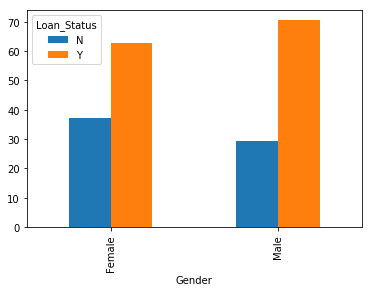

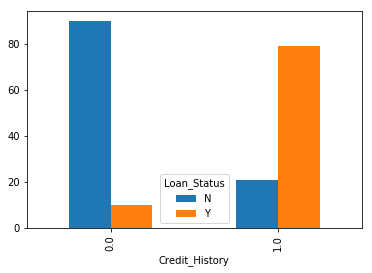

In [64]:
print("Distribución del estátus de crédito en la base train sobre el total de género:")
print("\n")
print(pd.crosstab(train2["Gender"],train2["Loan_Status"]).apply(lambda r: r/r.sum() *100,axis=1))
print("\n")
plot = pd.crosstab(index=train2['Gender'],columns=train2['Loan_Status']).apply(lambda r: r/r.sum() *100,axis=1).plot(kind='bar')


print("\n")
print("Distribución del estátus de crédito en la base train sobre el total de historial crediticio:")
print("\n")
print(pd.crosstab(train2["Credit_History"],train2["Loan_Status"]).apply(lambda r: r/r.sum() *100,axis=1))
print("\n")
plot = pd.crosstab(index=train2['Credit_History'],columns=train2['Loan_Status']).apply(lambda r: r/r.sum() *100,axis=1).plot(kind='bar')

print("\n")
print("Del total de mujeres que solicitaron un crédito, tan solo al 62.7% se les otorgó, mientras que del total de hombres que lo solicitaron, al 70% se les otorgó. Es decir, existe una pequeña ventaja de ser acreedor a un crédito siendo hombre el solicitante.")
print("\n")
print("Por otra parte, si previamente ya has tenido un crédito, tus probabilidades de ser acreedor a otro son del 79%. Si se trata de tu primer crédito, tienes solo u 10% de probabilidad de que te lo den")

#### 9. Haz un histograma para el ingreso de la persona y otro para la cantidad prestada. ¿Qué observas?

Histograma de ingreso
AxesSubplot(0.125,0.125;0.775x0.755)


La mayoría de las personas que solicitan un crédito tienen un sueldo menor a $10,000


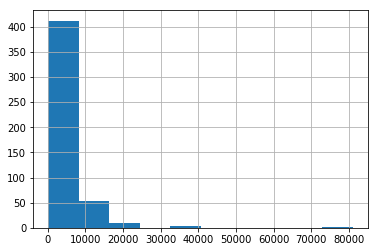

In [47]:
print("Histograma de ingreso")
print(train2['ApplicantIncome'].hist(bins=10))
print("\n")
print("La mayoría de las personas que solicitan un crédito tienen un sueldo menor a $10,000")


Histograma de monto de crédito
AxesSubplot(0.125,0.125;0.775x0.755)


La mayoría de las personas que solicitan un crédito lo hacen por un monto de entre a $100 y $200


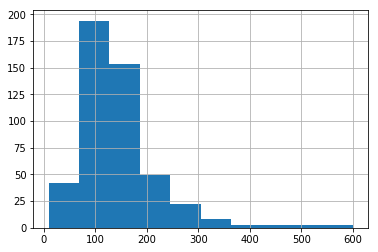

In [48]:
print("Histograma de monto de crédito")
print(train2['LoanAmount'].hist(bins=10))
print("\n")
print("La mayoría de las personas que solicitan un crédito lo hacen por un monto de entre a $100 y $200")

#### 10. Haz un boxplot para la cantidad del préstamo según el historial crediticio de la persona. ¿Hay diferencias en la cantidad prestada dependiendo si tiene historial o no? Repite el mismo boxplot pero ahora según el sexo. ¿Hay diferencias?



Boxplot de monto del crédito
AxesSubplot(0.125,0.125;0.775x0.755)


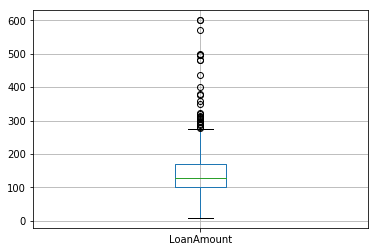

In [51]:
print("\n")
print("Boxplot de monto del crédito")
print(train2.boxplot(column=['LoanAmount']))




Boxplot de monto del crédito por género del solicitante
AxesSubplot(0.1,0.15;0.8x0.75)


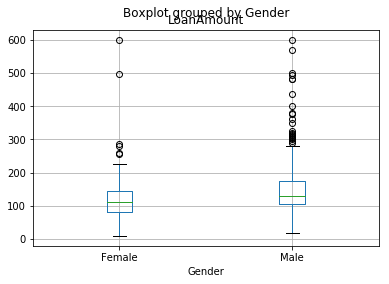

In [52]:
print("\n")
print("Boxplot de monto del crédito por género del solicitante")
print(train2.boxplot(column=['LoanAmount'], by='Gender'))
print("\n")
print("El monto promedio de los créditos es apenas mayor cuando el solicitante es Hombre")



Boxplot de monto del crédito por historia crediticia de los solicitantes
AxesSubplot(0.1,0.15;0.8x0.75)


Si un cliente tuvo previamente otro crédito no discrimina el monto del préstamo, sin embargo, cuando ya se cuenta con prestamos previos, suele haber montos por encima del tercer cuartil de la distribución de los montos


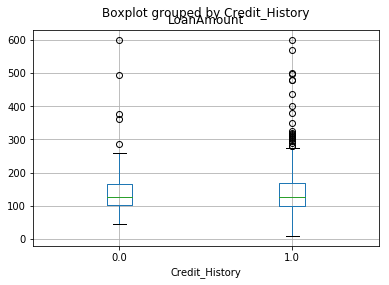

In [56]:
print("\n")
print("Boxplot de monto del crédito por historia crediticia de los solicitantes")
print(train2.boxplot(column=['LoanAmount'], by='Credit_History'))
print("\n")
print("Si un cliente tuvo previamente otro crédito no discrimina el monto del préstamo, sin embargo, cuando ya se cuenta con prestamos previos, suele haber montos por encima del tercer cuartil de la distribución de los montos")